# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [34]:
df = pd.read_csv('housing.csv')

print(df.head())

print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [25]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [35]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['ocean_proximity'])

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\shinoki\AppData\Local\Temp\ipykernel_7100\3635933569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

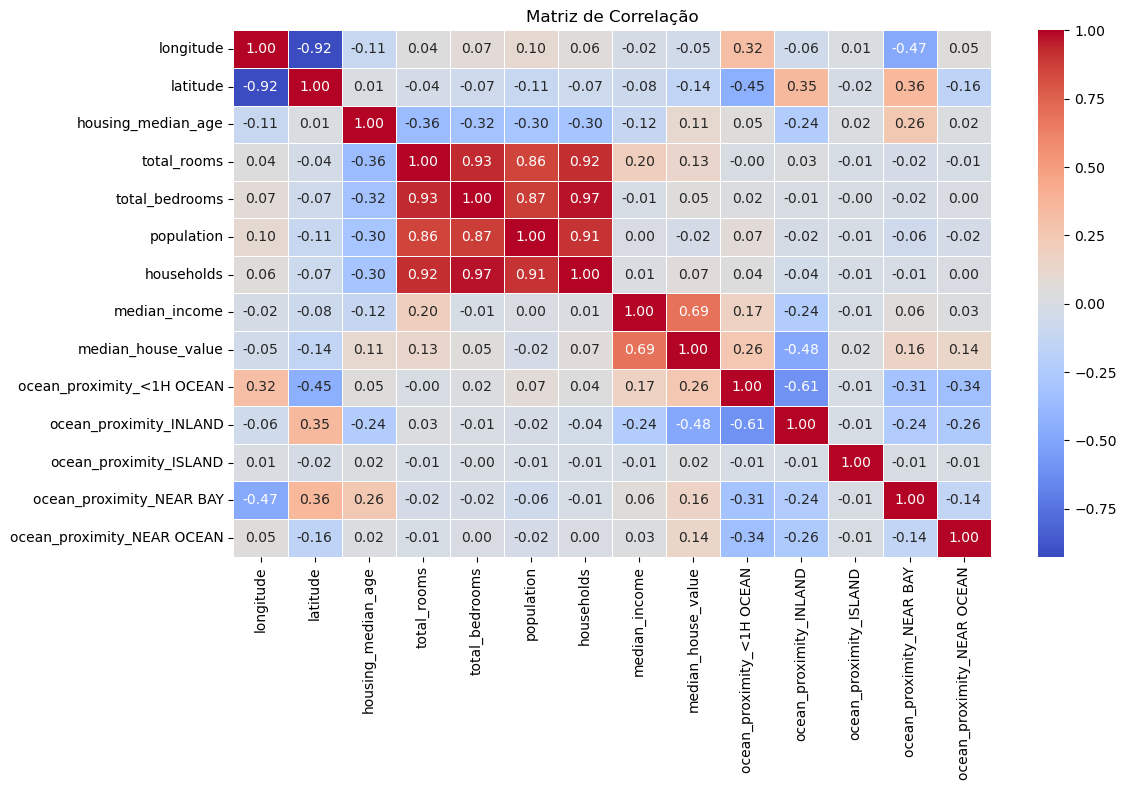

In [37]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()


### 3. Separe os dados em validação e teste

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_8.fit(X_train_final, y_train_final)

tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X_train_final, y_train_final)

y_pred_8 = tree_8.predict(X_val)
y_pred_2 = tree_2.predict(X_val)

def avaliar_modelo(y_true, y_pred, nome_modelo):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{nome_modelo} → R²: {r2:.3f} | RMSE: {rmse:.2f}")

avaliar_modelo(y_val, y_pred_8, "Árvore max_depth=8")
avaliar_modelo(y_val, y_pred_2, "Árvore max_depth=2")

Árvore max_depth=8 → R²: 0.701 | RMSE: 64123.80
Árvore max_depth=2 → R²: 0.502 | RMSE: 82658.94


C:\Users\shinoki\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\shinoki\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [42]:
from sklearn.metrics import mean_squared_error

y_train_pred_8 = tree_8.predict(X_train_final)
y_train_pred_2 = tree_2.predict(X_train_final)

y_test_pred_8 = tree_8.predict(X_test)
y_test_pred_2 = tree_2.predict(X_test)

mse_train_8 = mean_squared_error(y_train_final, y_train_pred_8)
mse_train_2 = mean_squared_error(y_train_final, y_train_pred_2)

mse_test_8 = mean_squared_error(y_test, y_test_pred_8)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f"MSE Treino - Árvore max_depth=8: {mse_train_8:.2f}")
print(f"MSE Treino - Árvore max_depth=2: {mse_train_2:.2f}")
print(f"MSE Teste - Árvore max_depth=8: {mse_test_8:.2f}")
print(f"MSE Teste - Árvore max_depth=2: {mse_test_2:.2f}")

MSE Treino - Árvore max_depth=8: 3162856542.20
MSE Treino - Árvore max_depth=2: 6662264370.21
MSE Teste - Árvore max_depth=8: 4102436959.72
MSE Teste - Árvore max_depth=2: 6896217359.58


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
Árvore max_depth=8

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

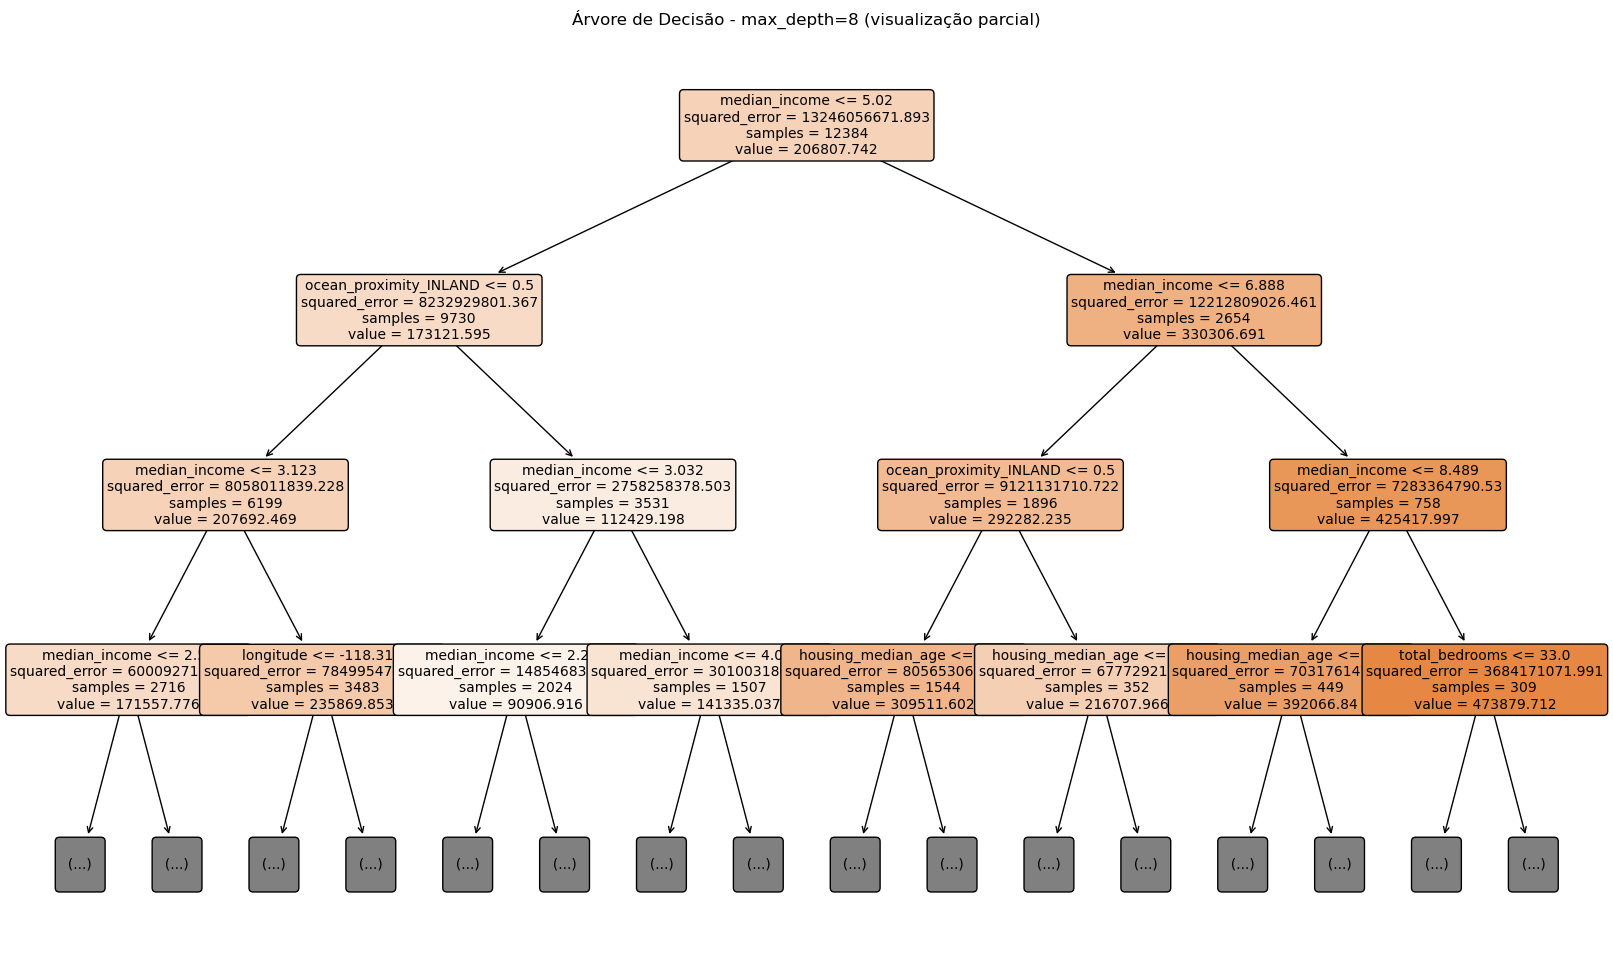

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(tree_8, 
          feature_names=X_train_final.columns, 
          filled=True, 
          rounded=True, 
          max_depth=3,  
          fontsize=10)
plt.title("Árvore de Decisão - max_depth=8 (visualização parcial)")
plt.show()

In [ ]:
A variável median_income